In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [77]:
class Data(object):
    def __init__(self, fname):
        self.f = h5py.File(fname, "r")
        
    @property
    def sequences(self):
        return self.f["sequences"].value
    
    @property
    def phi0(self):
        x = self.f["phi0"].value
        return x[~np.isnan(x[:,0]), :]

    @property
    def phi1(self):
        x = self.f["phi1"].value
        return x[~np.isnan(x[:,0]), :]
    
    @property
    def phi2(self):
        x = self.f["phi2"].value
        return x[~np.isnan(x[:,0]), :]

    @property
    def phi3(self):
        x = self.f["phi3"].value
        return x[~np.isnan(x[:,0]), :]
    
    @property
    def phi4(self):
        x = self.f["phi4"].value
        return x[~np.isnan(x[:,0]), :]
  
    @property
    def rsquared0(self):
        x = self.f["rsquared0"].value
        return x[~np.isnan(x[:,0, 0]), :, :]

    @property
    def rsquared1(self):
        x = self.f["rsquared1"].value
        return x[~np.isnan(x[:,1, 0]), :, :]
    
    @property
    def rsquared2(self):
        x = self.f["rsquared2"].value
        return x[~np.isnan(x[:,2, 0]), :, :]

    @property
    def rsquared3(self):
        x = self.f["rsquared3"].value
        return x[~np.isnan(x[:,3, 0]), :, :]
    
    @property
    def rsquared4(self):
        x = self.f["rsquared4"].value
        return x[~np.isnan(x[:,4, 0]), :, :]


In [78]:
d = Data("full-database.hdf5")

with open("phifull.csv", "w") as f:
    for i in range(100):
        wildtype = d.sequences[i][0].astype(str)
        mutant = d.sequences[i][1].astype(str) 
        vals = ",".join([str(val) for val in d.phifull[i]])
        f.write(",".join([wildtype,mutant,vals]) + "\n")

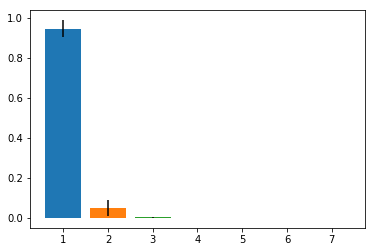

In [79]:
m = np.mean(d.phi0, axis=0)
s = np.std(d.phi0, axis=0)
for i in range(0,7):
    plt.bar(i+1, m[i], yerr=s[i], color="C"+str(i))

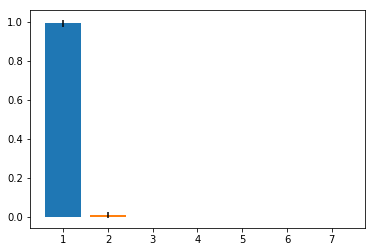

In [80]:
m = np.mean(d.phi1, axis=0)
s = np.std(d.phi1, axis=0)
for i in range(0,7):
    plt.bar(i+1, m[i], yerr=s[i], color="C"+str(i))

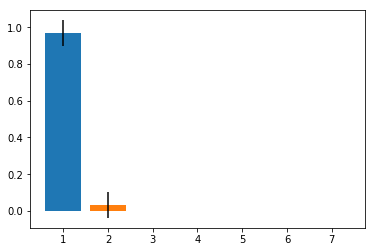

In [81]:
m = np.mean(d.phi2, axis=0)
s = np.std(d.phi2, axis=0)
for i in range(0,7):
    plt.bar(i+1, m[i], yerr=s[i], color="C"+str(i))

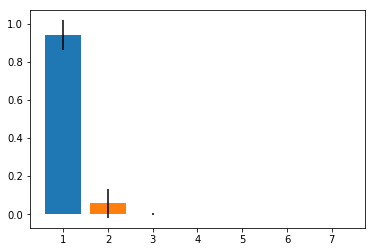

In [82]:
m = np.mean(d.phi3, axis=0)
s = np.std(d.phi3, axis=0)
for i in range(0,7):
    plt.bar(i+1, m[i], yerr=s[i], color="C"+str(i))

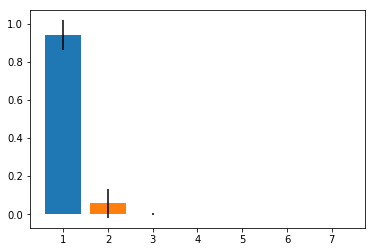

In [83]:
m = np.mean(d.phi4, axis=0)
s = np.std(d.phi4, axis=0)
for i in range(0,7):
    plt.bar(i+1, m[i], yerr=s[i], color="C"+str(i))

In [84]:
def stats(vals):
    vals.sort(axis=0)
    mean = np.mean(vals, axis=0)
    lower = vals[15]
    upper = vals[85]
    return mean, mean - lower, upper - mean

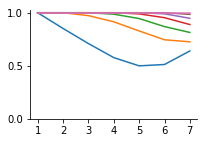

In [90]:
fig, ax = plt.subplots(figsize=(3,2))
for i in range(7):
    m, lower, upper = stats(d.rsquared4[:, i, :])
    ax.plot(range(1,8), m)

ticks = ax.set_xticks(range(1,8))
ticks = ax.set_yticks([0,.5,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)